In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
#extract the data
import urllib.request
from urllib.request import urlopen, Request
from bs4 import BeautifulSoup 
import pandas as pd
from urllib.request import urlopen, HTTPError

base_url = 'https://www.flipkart.com/search?q=laptop&sid=6bo%2Cb5g&as=on&as-show=on&otracker=AS_QueryStore_OrganicAutoSuggest_1_6_na_na_na&otracker1=AS_QueryStore_OrganicAutoSuggest_1_6_na_na_na&as-pos=1&as-type=HISTORY&suggestionId=laptop%7CLaptops&requestId=39fbc0fb-5085-4c7c-8f1c-0b92b4fdcbfe&as-searchtext=laptop&page='

url_list = ["{}{}".format(base_url, str(page)) for page in range(1, 33)]
s=[]
for url in url_list:
    s.append(url)
product= []
price= []
ratings=[]
processors=[]
ram=[]
os=[]
storage=[]
inches=[]
warranty=[]


for pg in s:
    
    page = urllib.request.urlopen(pg)
    try:
        search_response = urllib.request.urlopen(pg)
    except urllib.request.HTTPError:
        pass
    
    soup = BeautifulSoup(page, 'html.parser')
    #print(soup.prettify())
    commonclass=soup.find_all("li", {"class": "rgWa7D"})
    for i in range(0,len(commonclass)):
      p=commonclass[i].text 
      if("Core" in p): 
        processors.append(p)
      elif("RAM" in p): 
        ram.append(p)
      elif("HDD" in p or "SSD" in p):
        storage.append(p)
      elif("Operating" in p):
        os.append(p)
      elif("Display" in p):
        inches.append(p)
      elif("Warranty" in p):
        warranty.append(p)

  
    ls = soup.find_all("div", {"class": "_4rR01T"})
    for x in range(len(ls)):
   
      product.append((ls[x].get_text(strip=True)))
   
    ls1=soup.find_all("div", {"class": "_30jeq3 _1_WHN1"})
    for x in range(len(ls1)):
      price.append((ls1[x].get_text(strip=True)))
    ls2=soup.find_all("div", {"class": "_3LWZlK"})
    for x in range(len(ls2)):
      ratings.append(ls2[x].get_text(strip=True))
mydict = {'Description':product,'Processor':processors,'RAM':ram,'Operating System':os,'Storage':storage,'Display':inches,'Warranty':warranty,'Price':price,'Ratings':ratings}
dict_df = pd.DataFrame({ key:pd.Series(value) for key, value in mydict.items() })
df = dict_df.dropna()
df




,Description,Processor,RAM,Operating System,Storage,Display,Warranty,Price,Ratings
0,Mi Notebook Horizon Edition 14 Core i7 10th Ge...,Intel Core i7 Processor (10th Gen),8 GB DDR4 RAM,64 bit Windows 10 Operating System,512 GB SSD,35.56 cm (14 inch) Display,1 Year Manufacturer Warranty from the Date of ...,"₹56,999",4.2
1,HP Pavilion Core i7 11th Gen - (16 GB/1 TB SSD...,Intel Core i7 Processor (11th Gen),16 GB DDR4 RAM,64 bit Windows 10 Operating System,1 TB SSD,35.56 cm (14 inch) Display,1 Year Onsite Warranty,"₹84,990",4.4
2,acer Aspire 7 Core i5 10th Gen - (8 GB/512 GB ...,Intel Core i5 Processor (10th Gen),8 GB DDR4 RAM,64 bit Windows 10 Operating System,512 GB SSD,39.62 cm (15.6 inch) Display,1 Year International Travelers Warranty,"₹54,990",4.5
3,Lenovo IdeaPad 3 Core i3 10th Gen - (8 GB/256 ...,Intel Core i3 Processor (10th Gen),8 GB DDR4 RAM,Windows 10 Operating System,256 GB SSD,39.62 cm (15.6 Inch) Display,2 Years Warranty,"₹39,990",4.4
4,ASUS Core i3 10th Gen - (4 GB + 32 GB Optane/5...,Intel Core i3 Processor (10th Gen),4 GB DDR4 RAM,64 bit Windows 10 Operating System,512 GB SSD,39.62 cm (15.6 inch) Display,1 Year Onsite Warranty,"₹37,990",4.4
...,...,...,...,...,...,...,...,...,...
716,Lenovo Ideapad 330 Core i5 8th Gen - (8 GB/1 T...,Intel Core i7 Processor (11th Gen),8 GB DDR4 RAM,64 bit Windows 10 Operating System,1 TB HDD,33.78 cm (13.3 inch) Display,1 Year International Travellers Warranty(ITW),"₹46,990",4.4
717,ASUS Core i3 10th Gen - (4 GB/1 TB HDD/Windows...,Intel Core i7 Processor (10th Gen),8 GB DDR4 RAM,64 bit Windows 10 Operating System,512 GB SSD,35.56 cm (14 inch) Display,1 Year Onsite Warranty,"₹38,990",4.7
718,HP Pavilion Laptop 15-eg Core i5 11th Gen - (1...,Intel Core i3 Processor (10th Gen),4 GB DDR4 RAM,64 bit Windows 10 Operating System,256 GB SSD,39.62 cm (15.6 inch) Display,1 Year Onsite Warranty,"₹88,000",4.1
719,HP OMEN 15 Ryzen 7 Octa Core 5800H - (16 GB/1 ...,Intel Core i7 Processor (11th Gen),16 GB DDR4 RAM,64 bit Windows 10 Operating System,512 GB SSD,35.56 cm (14 inch) Display,1 Year Manufacturing Warranty,"₹1,19,990",4.6


In [3]:
pd.set_option('display.max_columns', None)
df

,Description,Processor,RAM,Operating System,Storage,Display,Warranty,Price,Ratings
0,Mi Notebook Horizon Edition 14 Core i7 10th Ge...,Intel Core i7 Processor (10th Gen),8 GB DDR4 RAM,64 bit Windows 10 Operating System,512 GB SSD,35.56 cm (14 inch) Display,1 Year Manufacturer Warranty from the Date of ...,"₹56,999",4.2
1,HP Pavilion Core i7 11th Gen - (16 GB/1 TB SSD...,Intel Core i7 Processor (11th Gen),16 GB DDR4 RAM,64 bit Windows 10 Operating System,1 TB SSD,35.56 cm (14 inch) Display,1 Year Onsite Warranty,"₹84,990",4.4
2,acer Aspire 7 Core i5 10th Gen - (8 GB/512 GB ...,Intel Core i5 Processor (10th Gen),8 GB DDR4 RAM,64 bit Windows 10 Operating System,512 GB SSD,39.62 cm (15.6 inch) Display,1 Year International Travelers Warranty,"₹54,990",4.5
3,Lenovo IdeaPad 3 Core i3 10th Gen - (8 GB/256 ...,Intel Core i3 Processor (10th Gen),8 GB DDR4 RAM,Windows 10 Operating System,256 GB SSD,39.62 cm (15.6 Inch) Display,2 Years Warranty,"₹39,990",4.4
4,ASUS Core i3 10th Gen - (4 GB + 32 GB Optane/5...,Intel Core i3 Processor (10th Gen),4 GB DDR4 RAM,64 bit Windows 10 Operating System,512 GB SSD,39.62 cm (15.6 inch) Display,1 Year Onsite Warranty,"₹37,990",4.4
...,...,...,...,...,...,...,...,...,...
716,Lenovo Ideapad 330 Core i5 8th Gen - (8 GB/1 T...,Intel Core i7 Processor (11th Gen),8 GB DDR4 RAM,64 bit Windows 10 Operating System,1 TB HDD,33.78 cm (13.3 inch) Display,1 Year International Travellers Warranty(ITW),"₹46,990",4.4
717,ASUS Core i3 10th Gen - (4 GB/1 TB HDD/Windows...,Intel Core i7 Processor (10th Gen),8 GB DDR4 RAM,64 bit Windows 10 Operating System,512 GB SSD,35.56 cm (14 inch) Display,1 Year Onsite Warranty,"₹38,990",4.7
718,HP Pavilion Laptop 15-eg Core i5 11th Gen - (1...,Intel Core i3 Processor (10th Gen),4 GB DDR4 RAM,64 bit Windows 10 Operating System,256 GB SSD,39.62 cm (15.6 inch) Display,1 Year Onsite Warranty,"₹88,000",4.1
719,HP OMEN 15 Ryzen 7 Octa Core 5800H - (16 GB/1 ...,Intel Core i7 Processor (11th Gen),16 GB DDR4 RAM,64 bit Windows 10 Operating System,512 GB SSD,35.56 cm (14 inch) Display,1 Year Manufacturing Warranty,"₹1,19,990",4.6


In [4]:
df['Memory']=df['RAM'].copy()
list1=set(df['Memory'])
list1

{'12 GB DDR4 RAM',
 '16 GB DDR3 RAM',
 '16 GB DDR4 RAM',
 '16 GB LPDDR3 RAM',
 '16 GB LPDDR4X RAM',
 '32 GB DDR4 RAM',
 '32 GB LPDDR4X RAM',
 '4 GB DDR3 RAM',
 '4 GB DDR4 RAM',
 '4 GB LPDDR4 RAM',
 '4 GB LPDDR4X RAM',
 '8 GB DDR3 RAM',
 '8 GB DDR4 RAM',
 '8 GB LPDDR3 RAM',
 '8 GB LPDDR4X RAM',
 'Upgradable SSD Upto 512 GB and RAM Upto 32 GB'}

In [5]:

ram_dataset=[]

for i in df['Memory']:
  if (i[0]=='8'):
    ram_dataset.append('8')
  elif (i[0]=='4'):
    ram_dataset.append('4')
  elif (i[0]=='1'):
    ram_dataset.append('16')
  else:
    ram_dataset.append('32')
df['Ram_in_gb']=ram_dataset
#df.drop(['RAM'],axis=1,inplace=True)



In [6]:
df['Capacity']=df['Storage'].copy()
list1=set(df['Capacity'])
list1

{'1 TB HDD',
 '1 TB HDD|128 GB SSD',
 '1 TB HDD|256 GB SSD',
 '1 TB HDD|512 GB SSD',
 '1 TB SSD',
 '128 GB NVMe PCIe 3.0 x4 SSD',
 '128 GB SSD',
 '128 GB SSD for Reduced Boot Up Time and In Game Loading',
 '128 GB SSD for Reduced Boot Up Time and in Game Loading',
 '2 TB SSD',
 '256 GB SSD',
 '256 GB, NA SSD',
 '3 TB SSD',
 '512 GB HDD|512 GB SSD',
 '512 GB SSD',
 '512 GB SSD for Reduced Boot Up Time and in Game Loading',
 'M.2 Slot for SSD Upgrade',
 'PCI-e SSD (NVMe) ready,Cooler Boost,Hi-Res Audio,Nahimic 3,Thin Bezel,Military-Grade Durability',
 'PCI-e SSD (NVMe) ready,Cooler Boost,Matrix Display (Extend),Hi-Res Audio,Nahimic 3,144Hz Panel,Thin Bezel',
 'PCI-e SSD (NVMe) ready,SHIFT,Silver-Lining Print,Cooler Boost 5,Audio Boost,Dragon Center,Nahimic 3,Narrow Bezel, 144Hz Panel',
 'PCI-e SSD (NVMe) ready,Silver-Lining Print Keyboard,Matrix Display (Extend),Cooler Boost 5,Hi-Res Audio,Nahimic 3,144Hz Panel,Thin Bezel,RGB Gaming Keyboard,Speaker Tuning Engine,MSI Center'}

In [7]:

disk_drive = []
for i in df['Capacity']:
  if('HDD' in i and 'SSD' not in i):  
    disk_drive.append('HDD')
  elif('SSD' in i and 'HDD' not in i): 
    disk_drive.append('SSD')
  elif('HDD' in i and 'SSD' in i):   
    disk_drive.append('Both')
df['disk_drive'] = disk_drive
#df.drop(['Storage'],axis=1,inplace=True)

df

,Description,Processor,RAM,Operating System,Storage,Display,Warranty,Price,Ratings,Memory,Ram_in_gb,Capacity,disk_drive
0,Mi Notebook Horizon Edition 14 Core i7 10th Ge...,Intel Core i7 Processor (10th Gen),8 GB DDR4 RAM,64 bit Windows 10 Operating System,512 GB SSD,35.56 cm (14 inch) Display,1 Year Manufacturer Warranty from the Date of ...,"₹56,999",4.2,8 GB DDR4 RAM,8,512 GB SSD,SSD
1,HP Pavilion Core i7 11th Gen - (16 GB/1 TB SSD...,Intel Core i7 Processor (11th Gen),16 GB DDR4 RAM,64 bit Windows 10 Operating System,1 TB SSD,35.56 cm (14 inch) Display,1 Year Onsite Warranty,"₹84,990",4.4,16 GB DDR4 RAM,16,1 TB SSD,SSD
2,acer Aspire 7 Core i5 10th Gen - (8 GB/512 GB ...,Intel Core i5 Processor (10th Gen),8 GB DDR4 RAM,64 bit Windows 10 Operating System,512 GB SSD,39.62 cm (15.6 inch) Display,1 Year International Travelers Warranty,"₹54,990",4.5,8 GB DDR4 RAM,8,512 GB SSD,SSD
3,Lenovo IdeaPad 3 Core i3 10th Gen - (8 GB/256 ...,Intel Core i3 Processor (10th Gen),8 GB DDR4 RAM,Windows 10 Operating System,256 GB SSD,39.62 cm (15.6 Inch) Display,2 Years Warranty,"₹39,990",4.4,8 GB DDR4 RAM,8,256 GB SSD,SSD
4,ASUS Core i3 10th Gen - (4 GB + 32 GB Optane/5...,Intel Core i3 Processor (10th Gen),4 GB DDR4 RAM,64 bit Windows 10 Operating System,512 GB SSD,39.62 cm (15.6 inch) Display,1 Year Onsite Warranty,"₹37,990",4.4,4 GB DDR4 RAM,4,512 GB SSD,SSD
...,...,...,...,...,...,...,...,...,...,...,...,...,...
716,Lenovo Ideapad 330 Core i5 8th Gen - (8 GB/1 T...,Intel Core i7 Processor (11th Gen),8 GB DDR4 RAM,64 bit Windows 10 Operating System,1 TB HDD,33.78 cm (13.3 inch) Display,1 Year International Travellers Warranty(ITW),"₹46,990",4.4,8 GB DDR4 RAM,8,1 TB HDD,HDD
717,ASUS Core i3 10th Gen - (4 GB/1 TB HDD/Windows...,Intel Core i7 Processor (10th Gen),8 GB DDR4 RAM,64 bit Windows 10 Operating System,512 GB SSD,35.56 cm (14 inch) Display,1 Year Onsite Warranty,"₹38,990",4.7,8 GB DDR4 RAM,8,512 GB SSD,SSD
718,HP Pavilion Laptop 15-eg Core i5 11th Gen - (1...,Intel Core i3 Processor (10th Gen),4 GB DDR4 RAM,64 bit Windows 10 Operating System,256 GB SSD,39.62 cm (15.6 inch) Display,1 Year Onsite Warranty,"₹88,000",4.1,4 GB DDR4 RAM,4,256 GB SSD,SSD
719,HP OMEN 15 Ryzen 7 Octa Core 5800H - (16 GB/1 ...,Intel Core i7 Processor (11th Gen),16 GB DDR4 RAM,64 bit Windows 10 Operating System,512 GB SSD,35.56 cm (14 inch) Display,1 Year Manufacturing Warranty,"₹1,19,990",4.6,16 GB DDR4 RAM,16,512 GB SSD,SSD


In [8]:
#df.drop(['Storage','RAM',"Memory",'Price',''],axis=1,inplace=True)

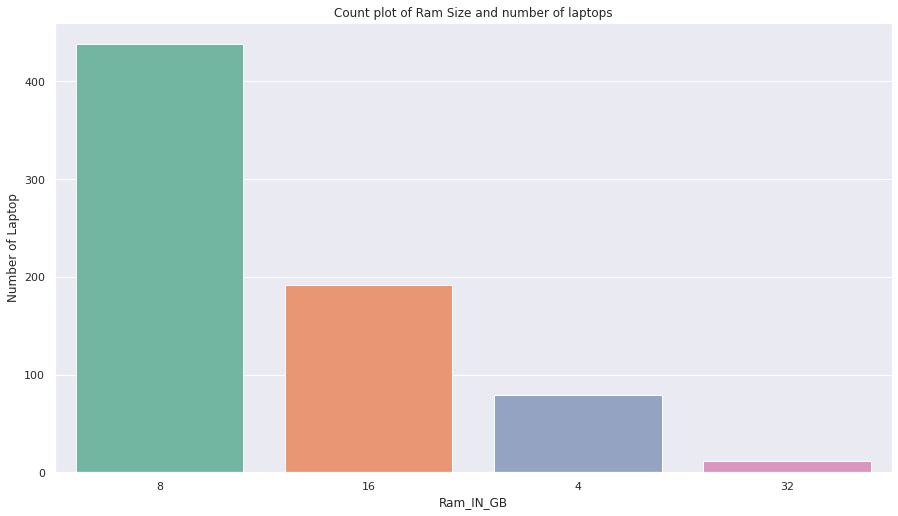

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(rc={'figure.figsize':(15,8.27)})
sns.set_theme(style="darkgrid")
sns.countplot(x ='Ram_in_gb', data =df,palette = "Set2")
plt.title("Count plot of Ram Size and number of laptops")
plt.xlabel('Ram_IN_GB')
plt.ylabel("Number of Laptop")
plt.show()

In [10]:

prices=[]
for i in df['Price']:
  i = i.replace('₹','')
  i = i.replace(',','')
  
  prices.append(i)
df['prices_in_₹']=prices
df


,Description,Processor,RAM,Operating System,Storage,Display,Warranty,Price,Ratings,Memory,Ram_in_gb,Capacity,disk_drive,prices_in_₹
0,Mi Notebook Horizon Edition 14 Core i7 10th Ge...,Intel Core i7 Processor (10th Gen),8 GB DDR4 RAM,64 bit Windows 10 Operating System,512 GB SSD,35.56 cm (14 inch) Display,1 Year Manufacturer Warranty from the Date of ...,"₹56,999",4.2,8 GB DDR4 RAM,8,512 GB SSD,SSD,56999
1,HP Pavilion Core i7 11th Gen - (16 GB/1 TB SSD...,Intel Core i7 Processor (11th Gen),16 GB DDR4 RAM,64 bit Windows 10 Operating System,1 TB SSD,35.56 cm (14 inch) Display,1 Year Onsite Warranty,"₹84,990",4.4,16 GB DDR4 RAM,16,1 TB SSD,SSD,84990
2,acer Aspire 7 Core i5 10th Gen - (8 GB/512 GB ...,Intel Core i5 Processor (10th Gen),8 GB DDR4 RAM,64 bit Windows 10 Operating System,512 GB SSD,39.62 cm (15.6 inch) Display,1 Year International Travelers Warranty,"₹54,990",4.5,8 GB DDR4 RAM,8,512 GB SSD,SSD,54990
3,Lenovo IdeaPad 3 Core i3 10th Gen - (8 GB/256 ...,Intel Core i3 Processor (10th Gen),8 GB DDR4 RAM,Windows 10 Operating System,256 GB SSD,39.62 cm (15.6 Inch) Display,2 Years Warranty,"₹39,990",4.4,8 GB DDR4 RAM,8,256 GB SSD,SSD,39990
4,ASUS Core i3 10th Gen - (4 GB + 32 GB Optane/5...,Intel Core i3 Processor (10th Gen),4 GB DDR4 RAM,64 bit Windows 10 Operating System,512 GB SSD,39.62 cm (15.6 inch) Display,1 Year Onsite Warranty,"₹37,990",4.4,4 GB DDR4 RAM,4,512 GB SSD,SSD,37990
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
716,Lenovo Ideapad 330 Core i5 8th Gen - (8 GB/1 T...,Intel Core i7 Processor (11th Gen),8 GB DDR4 RAM,64 bit Windows 10 Operating System,1 TB HDD,33.78 cm (13.3 inch) Display,1 Year International Travellers Warranty(ITW),"₹46,990",4.4,8 GB DDR4 RAM,8,1 TB HDD,HDD,46990
717,ASUS Core i3 10th Gen - (4 GB/1 TB HDD/Windows...,Intel Core i7 Processor (10th Gen),8 GB DDR4 RAM,64 bit Windows 10 Operating System,512 GB SSD,35.56 cm (14 inch) Display,1 Year Onsite Warranty,"₹38,990",4.7,8 GB DDR4 RAM,8,512 GB SSD,SSD,38990
718,HP Pavilion Laptop 15-eg Core i5 11th Gen - (1...,Intel Core i3 Processor (10th Gen),4 GB DDR4 RAM,64 bit Windows 10 Operating System,256 GB SSD,39.62 cm (15.6 inch) Display,1 Year Onsite Warranty,"₹88,000",4.1,4 GB DDR4 RAM,4,256 GB SSD,SSD,88000
719,HP OMEN 15 Ryzen 7 Octa Core 5800H - (16 GB/1 ...,Intel Core i7 Processor (11th Gen),16 GB DDR4 RAM,64 bit Windows 10 Operating System,512 GB SSD,35.56 cm (14 inch) Display,1 Year Manufacturing Warranty,"₹1,19,990",4.6,16 GB DDR4 RAM,16,512 GB SSD,SSD,119990


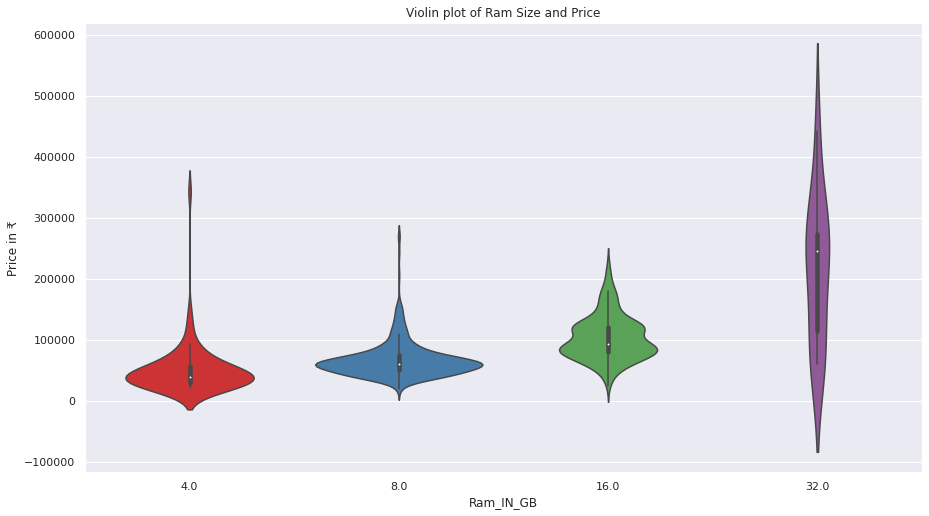

In [11]:
sns.set_theme(style="whitegrid")
df['prices_in_₹']=df['prices_in_₹'].astype(float)
df['Ram_in_gb']=df['Ram_in_gb'].astype(float)
sns.set(rc={'figure.figsize':(15,8.27)})
sns.set_theme(style="darkgrid")
sns.violinplot(x='Ram_in_gb',y="prices_in_₹",data=df,palette = "Set1")
plt.title("Violin plot of Ram Size and Price")
plt.xlabel('Ram_IN_GB')
plt.ylabel("Price in ₹")
plt.show()

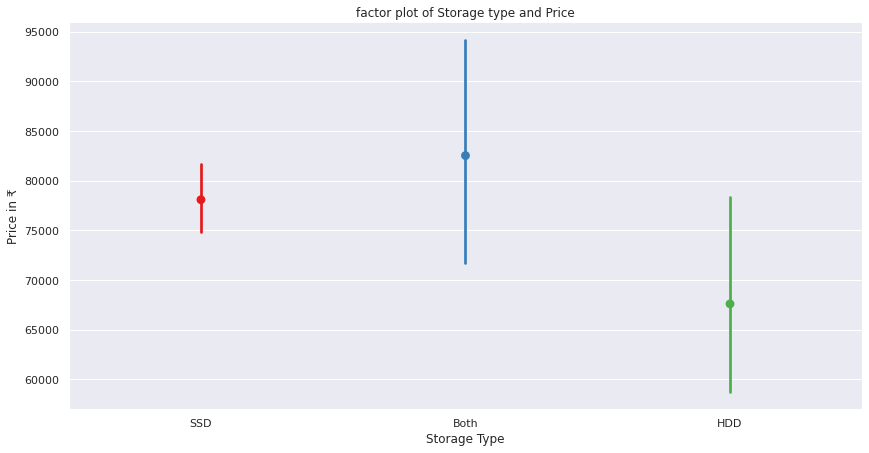

In [12]:

sns.set_theme(style="darkgrid")
sns.factorplot(x="disk_drive", y="prices_in_₹", data=df,palette="Set1",size=6, aspect=2)
plt.title("factor plot of Storage type and Price")
plt.xlabel('Storage Type')
plt.ylabel("Price in ₹")
plt.show()
plt.show()

In [13]:
#df.drop(['Storage','RAM',"Memory",'Price'],axis=1,inplace=True)
df

,Description,Processor,RAM,Operating System,Storage,Display,Warranty,Price,Ratings,Memory,Ram_in_gb,Capacity,disk_drive,prices_in_₹
0,Mi Notebook Horizon Edition 14 Core i7 10th Ge...,Intel Core i7 Processor (10th Gen),8 GB DDR4 RAM,64 bit Windows 10 Operating System,512 GB SSD,35.56 cm (14 inch) Display,1 Year Manufacturer Warranty from the Date of ...,"₹56,999",4.2,8 GB DDR4 RAM,8.0,512 GB SSD,SSD,56999.0
1,HP Pavilion Core i7 11th Gen - (16 GB/1 TB SSD...,Intel Core i7 Processor (11th Gen),16 GB DDR4 RAM,64 bit Windows 10 Operating System,1 TB SSD,35.56 cm (14 inch) Display,1 Year Onsite Warranty,"₹84,990",4.4,16 GB DDR4 RAM,16.0,1 TB SSD,SSD,84990.0
2,acer Aspire 7 Core i5 10th Gen - (8 GB/512 GB ...,Intel Core i5 Processor (10th Gen),8 GB DDR4 RAM,64 bit Windows 10 Operating System,512 GB SSD,39.62 cm (15.6 inch) Display,1 Year International Travelers Warranty,"₹54,990",4.5,8 GB DDR4 RAM,8.0,512 GB SSD,SSD,54990.0
3,Lenovo IdeaPad 3 Core i3 10th Gen - (8 GB/256 ...,Intel Core i3 Processor (10th Gen),8 GB DDR4 RAM,Windows 10 Operating System,256 GB SSD,39.62 cm (15.6 Inch) Display,2 Years Warranty,"₹39,990",4.4,8 GB DDR4 RAM,8.0,256 GB SSD,SSD,39990.0
4,ASUS Core i3 10th Gen - (4 GB + 32 GB Optane/5...,Intel Core i3 Processor (10th Gen),4 GB DDR4 RAM,64 bit Windows 10 Operating System,512 GB SSD,39.62 cm (15.6 inch) Display,1 Year Onsite Warranty,"₹37,990",4.4,4 GB DDR4 RAM,4.0,512 GB SSD,SSD,37990.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
716,Lenovo Ideapad 330 Core i5 8th Gen - (8 GB/1 T...,Intel Core i7 Processor (11th Gen),8 GB DDR4 RAM,64 bit Windows 10 Operating System,1 TB HDD,33.78 cm (13.3 inch) Display,1 Year International Travellers Warranty(ITW),"₹46,990",4.4,8 GB DDR4 RAM,8.0,1 TB HDD,HDD,46990.0
717,ASUS Core i3 10th Gen - (4 GB/1 TB HDD/Windows...,Intel Core i7 Processor (10th Gen),8 GB DDR4 RAM,64 bit Windows 10 Operating System,512 GB SSD,35.56 cm (14 inch) Display,1 Year Onsite Warranty,"₹38,990",4.7,8 GB DDR4 RAM,8.0,512 GB SSD,SSD,38990.0
718,HP Pavilion Laptop 15-eg Core i5 11th Gen - (1...,Intel Core i3 Processor (10th Gen),4 GB DDR4 RAM,64 bit Windows 10 Operating System,256 GB SSD,39.62 cm (15.6 inch) Display,1 Year Onsite Warranty,"₹88,000",4.1,4 GB DDR4 RAM,4.0,256 GB SSD,SSD,88000.0
719,HP OMEN 15 Ryzen 7 Octa Core 5800H - (16 GB/1 ...,Intel Core i7 Processor (11th Gen),16 GB DDR4 RAM,64 bit Windows 10 Operating System,512 GB SSD,35.56 cm (14 inch) Display,1 Year Manufacturing Warranty,"₹1,19,990",4.6,16 GB DDR4 RAM,16.0,512 GB SSD,SSD,119990.0


In [14]:
df.to_csv('file1.csv')